
Parkinsom's Disease

Its a neurodegenerative disorder that affects movement. It is characterized by symptoms such as tremors, stiffness, slowness of movement, and impaired balance and coordination. The disease results from the loss of dopamine-producing cells in the brain.

Now, let's briefly describe each attribute mentioned in the dataset related to Parkinson's disease:

MDVP:Fo(Hz): Fundamental frequency of the voice, representing the average vocal cord vibration rate.

MDVP:Fhi(Hz): Highest fundamental frequency of the voice observed.

MDVP:Flo(Hz): Lowest fundamental frequency of the voice observed.

MDVP:Jitter(%): Variation in the fundamental frequency of the voice, measured as a percentage.

MDVP:RAP: Relative Average Perturbation, which quantifies the rapid changes in the fundamental frequency.

MDVP:PPQ: Five-point period perturbation quotient, a measure of the period perturbation of the voice signal.

Jitter:DDP: Jitter (MDVP:RAP) is doubled, representing the average absolute difference of differences between consecutive periods.

MDVP:APQ: Five-point amplitude perturbation quotient, a measure of the amplitude perturbation of the voice signal.

NHR: Noise-to-Harmonics Ratio, representing the ratio of noise to harmonics in the voice signal.

HNR: Harmonics-to-Noise Ratio, representing the ratio of harmonics to noise in the voice signal.

RPDE: Recurrence Period Density Entropy, a measure of the complexity of the voice signal.

DFA: Detrended Fluctuation Analysis, quantifying the presence of long-term correlations in the voice signal.

spread2: Nonlinear measure of fundamental frequency variation.

D2: Correlation dimension, a measure of the complexity of the voice signal.

PPE: Pitch Period Entropy, representing the disorder and unpredictability of the voice signal.

These attributes are often used as features in machine learning models to predict the presence or progression of Parkinson's disease based on voice recordings. They provide insights into the characteristics of the voice signal and can help in diagnosing and monitoring the disease

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Documents\parkinson data\parkinsons_disease_data.csv")
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
data.name.duplicated().any()

False

In [8]:
data.isna().any().sum()

11

In [10]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        1
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            2
MDVP:PPQ            2
Jitter:DDP          3
MDVP:Shimmer        2
MDVP:Shimmer(dB)    2
Shimmer:APQ3        0
Shimmer:APQ5        1
MDVP:APQ            1
Shimmer:DDA         1
NHR                 0
HNR                 2
status              0
RPDE                0
DFA                 0
spread1             1
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().any().sum()

0

In [14]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [21]:
def plot_distribution(data, col):
    fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(40,10))
    sns.distplot(data[col], ax=ax[0])  
    data.boxplot(column=col, ax=ax[1])
    plt.show()

def find_outliers_normal(data, col):
    upper_bound = data[col].mean() + 3*data[col].std()
    lower_bound = data[col].mean() - 3*data[col].std()

    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]<lower_bound])
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")
    
def find_outliers_skewed(data, col):
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    
    upper_bound = data[col].quantile(0.75) + (IQR*1.5)
    lower_bound = data[col].quantile(0.25) - (IQR*1.5)
    
    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]<lower_bound])
    
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")


def remove_outliers_normal(data, col, threshold):
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    data= data[(z_scores.abs() < threshold)]
    
    return data

def remove_outliers_skewed(data, col):
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    
    upper_bridge = data[col].quantile(0.75) + (IQR*1.5)
    lower_bridge = data[col].quantile(0.25) - (IQR*1.5)
    
    data.loc[data[col]>=upper_bridge, col] = upper_bridge
    data.loc[data[col]<=lower_bridge, col] = lower_bridge
    
    return data

In [19]:
data_unique = data

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


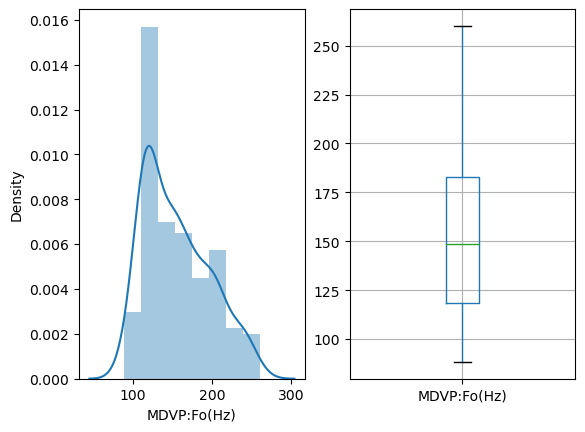

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


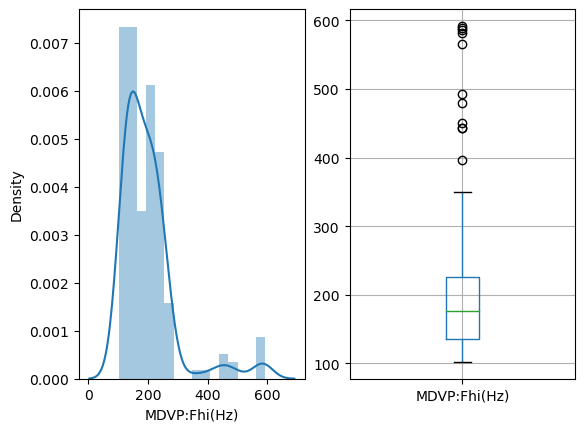

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


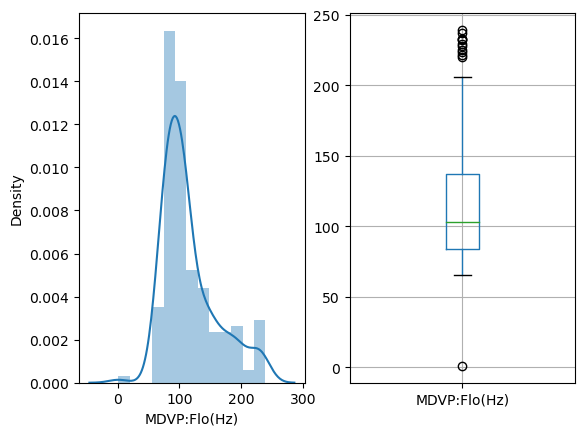

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


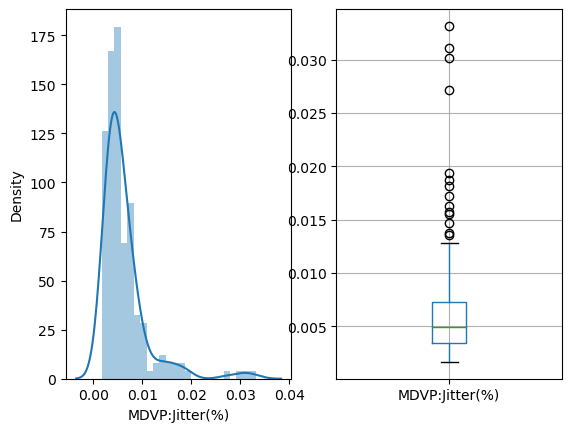

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


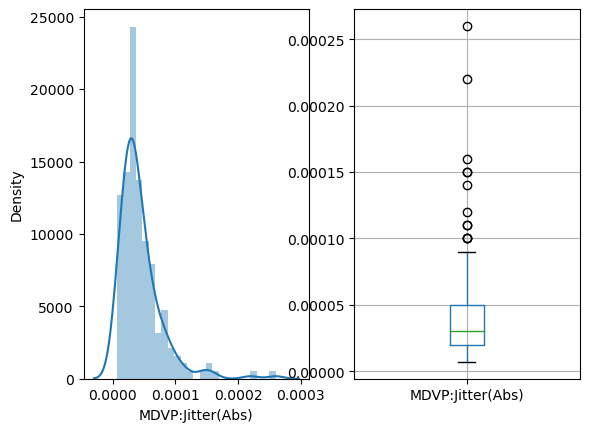

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


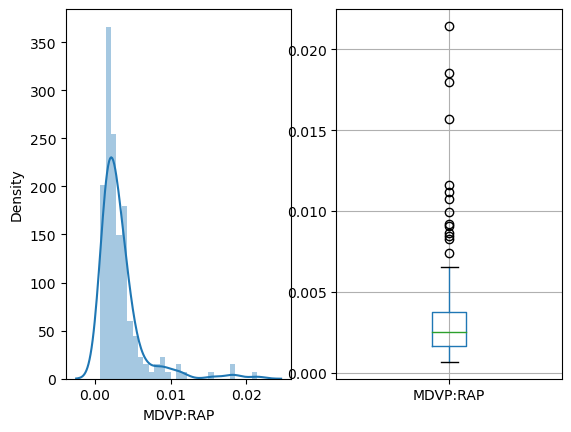

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


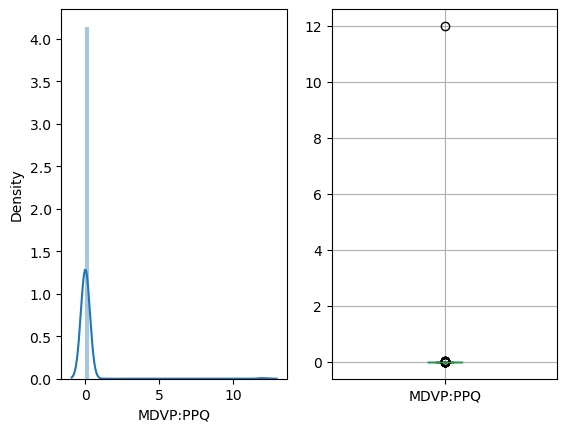

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


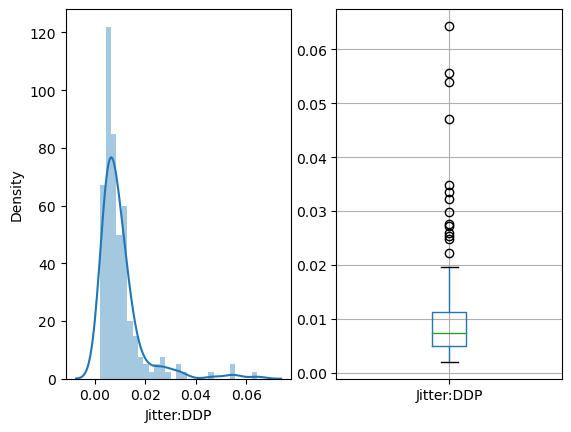

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


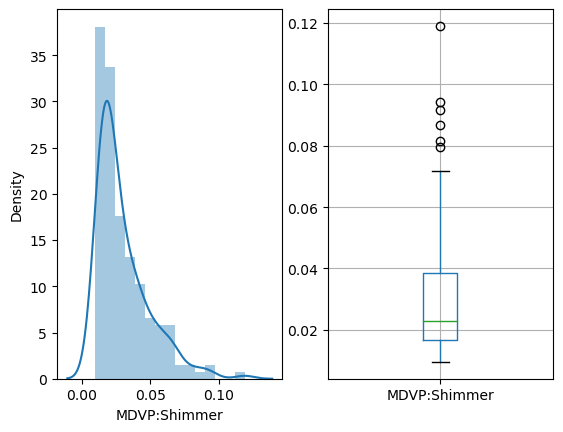

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


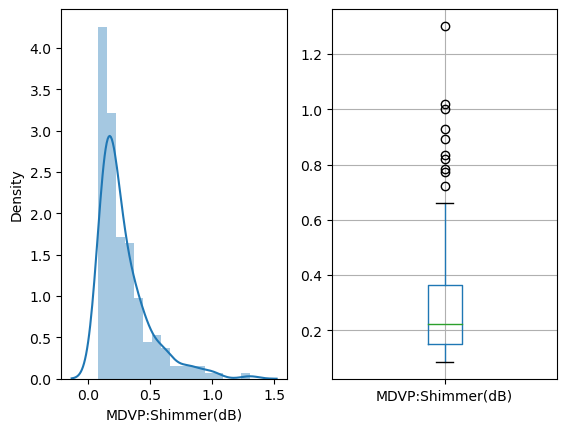

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


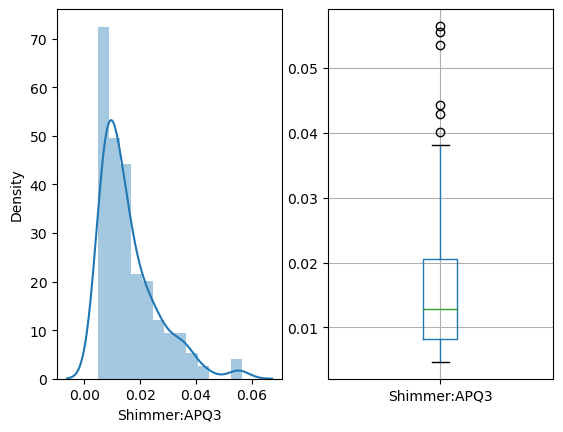

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


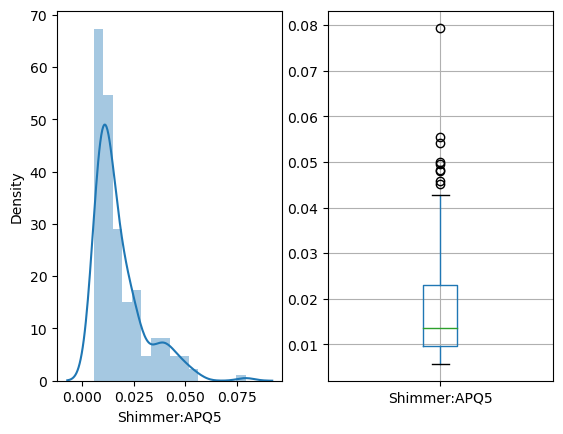

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


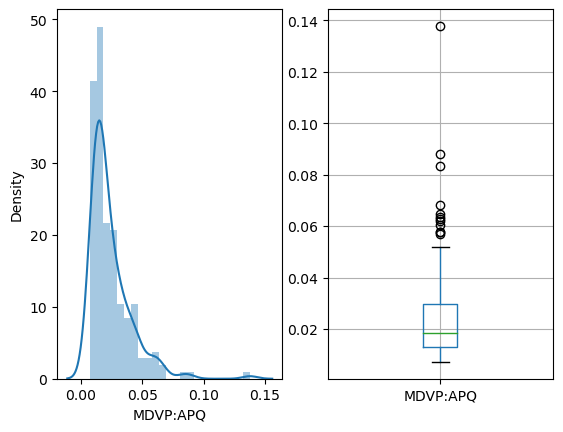

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


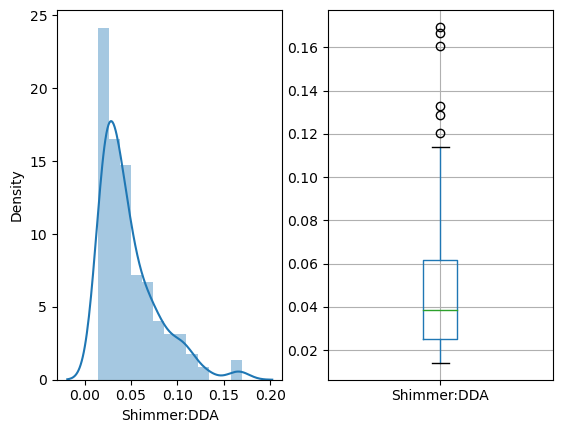

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


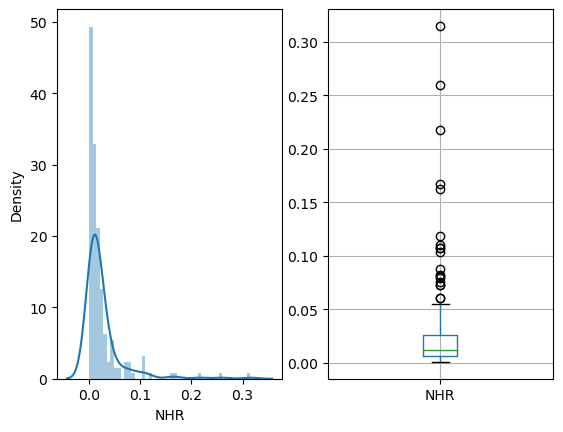

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


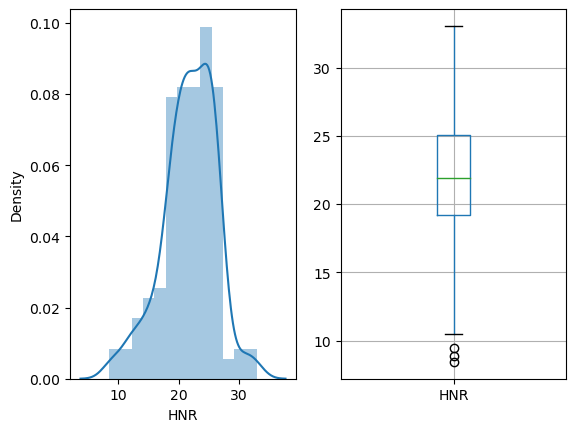

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


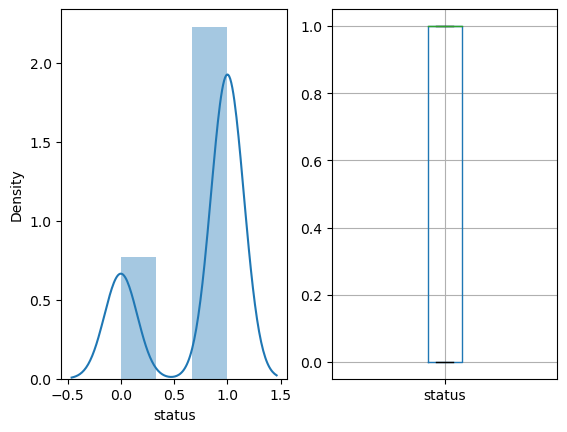

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


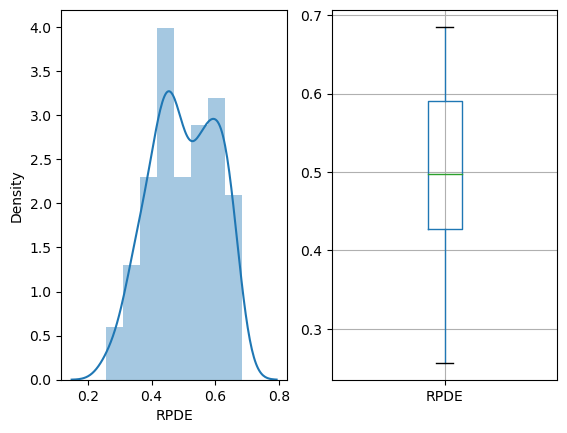

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


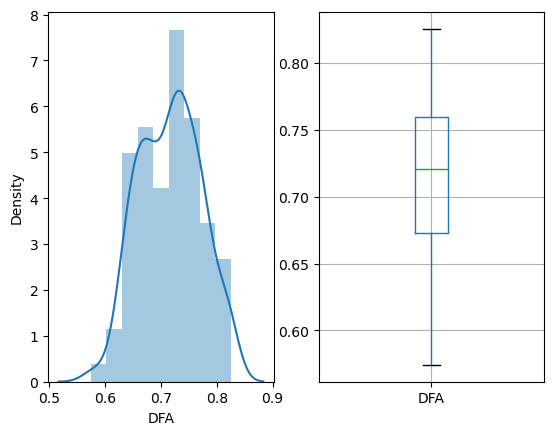

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


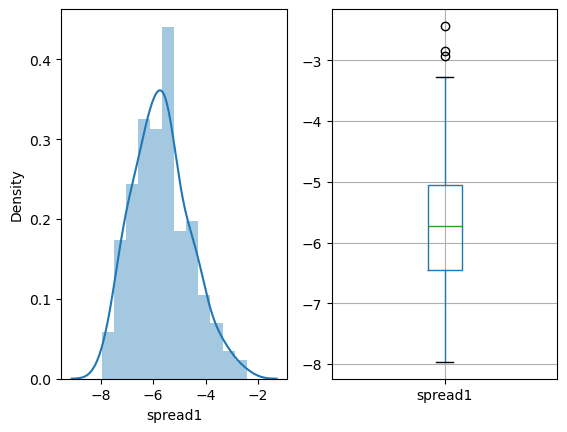

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


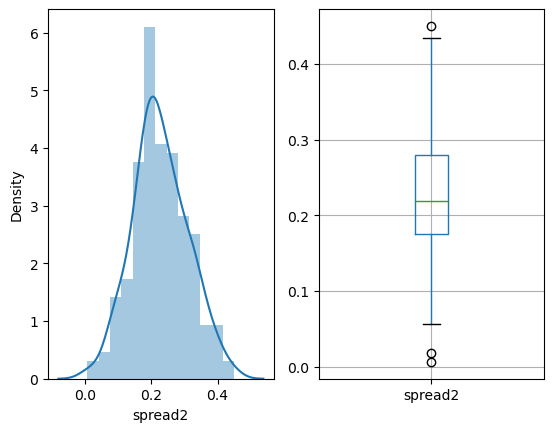

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


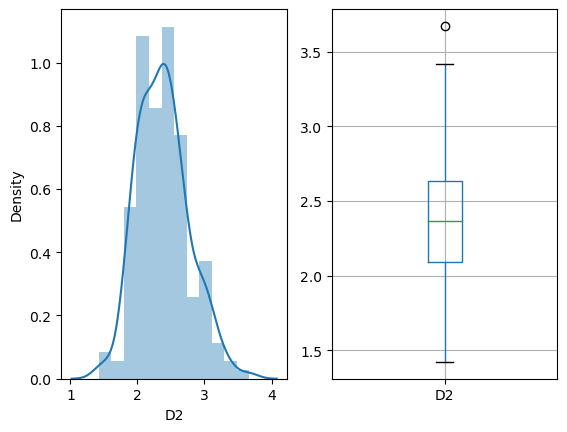

<Figure size 4000x1000 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\236481470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax[0])


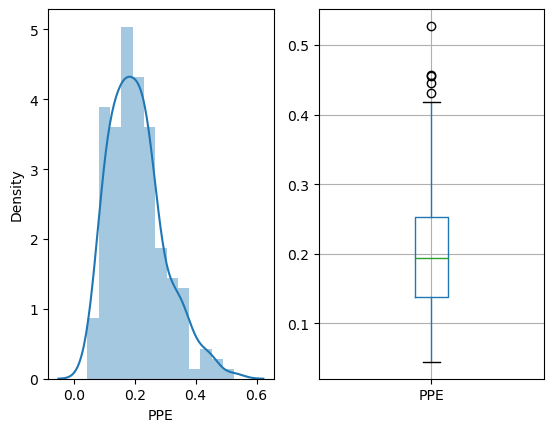

<Figure size 4000x1000 with 0 Axes>

In [22]:
# Select numerical columns
feature_list = data_unique.select_dtypes(include='number').columns

# Plot the histograms and boxplots to see the outliers for all numerical variable 
for feature in feature_list:
    plot_distribution(data_unique, feature)

In [23]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [25]:
data.status.unique()


array([1, 0], dtype=int64)

In [27]:
# Function to create dataframe for columns and its unique count of values, datatypes and type of columns
def find_categorical_continous_variables(data, threashold):
    dic = {}
    continus_cols = []
    categorical_cols = []

    for column in data.columns:
        li = []
        li.append(len(data[column].unique()))
        li.append(data[column].dtype)

        # Check if the column is categorical or continuous
        if len(data[column].unique()) <= threashold or data[column].dtype == 'O':
            li.append("Categorical column")
            categorical_cols.append(column)
        else:
            li.append("Continous Column")
            continus_cols.append(column)

        dic[column] = li
    
    # create dataframe for columns and its details
    dic_data = pd.DataFrame(dic, index=["Unique values", "Data Type", "Categorical/Continous"])
    
    # return the dataframe, and lists for continous and categorical columns
    return dic_data.T, categorical_cols, continus_cols

# Function to find descriptive statistics by providing it the contious cols and dataframe
def descriptive_statistics_continous(data, continus_cols):
    dic={}
    for col in continus_cols:
        dic[col] = []
        dic[col].append(data[col].mean())
        dic[col].append(data[col].median())
        dic[col].append(data[col].mode()[0])
        dic[col].append(data[col].std())
        dic[col].append(data[col].var())
        dic[col].append(data[col].max() - data[col].min())
        dic[col].append(data[col].quantile(0.75) - data[col].quantile(0.25) )
        dic[col].append(data[col].skew())
        dic[col].append(data[col].kurtosis())

    data_details = pd.DataFrame(dic, index=["Mean", "Median", "Mode", "Std Deviation", "Variance", "Range", "IQR", "Skew", "Kurtosis"])
    return data_details.T

In [28]:
# lets find out the unique counts, datatypes, variable type like continous/categorical and lists for columns names having continous/categorical columns
col_type_data, categorical_cols, continus_cols = find_categorical_continous_variables(data, 10)
# display the data
col_type_data

,Unique values,Data Type,Categorical/Continous
name,187,object,Categorical column
MDVP:Fo(Hz),186,float64,Continous Column
MDVP:Fhi(Hz),186,float64,Continous Column
MDVP:Flo(Hz),186,float64,Continous Column
MDVP:Jitter(%),166,float64,Continous Column
MDVP:Jitter(Abs),19,float64,Continous Column
MDVP:RAP,149,float64,Continous Column
MDVP:PPQ,159,float64,Continous Column
Jitter:DDP,172,float64,Continous Column
MDVP:Shimmer,179,float64,Continous Column


In [29]:
#the descriptive statistics 
descriptive_statistics_continous(data, continus_cols)

,Mean,Median,Mode,Std Deviation,Variance,Range,IQR,Skew,Kurtosis
MDVP:Fo(Hz),154.776465,148.790000,112.150000,41.393436,1.713417e+03,171.772000,64.414000,0.607888,-0.618762
MDVP:Fhi(Hz),198.291647,175.829000,131.669000,92.907196,8.631747e+03,489.885000,91.280000,2.503271,7.295780
MDVP:Flo(Hz),115.535856,103.370000,97.527000,44.592023,1.988449e+03,238.170000,53.365000,1.125708,0.753647
MDVP:Jitter(%),0.006246,0.004940,0.003690,0.004918,2.418642e-05,0.031480,0.003825,3.074549,11.748823
MDVP:Jitter(Abs),0.000044,0.000030,0.000030,0.000035,1.229186e-09,0.000253,0.000030,2.706584,11.077387
MDVP:RAP,0.003322,0.002500,0.001690,0.003013,9.075297e-06,0.020760,0.002095,3.341714,13.855252
MDVP:PPQ,0.067602,0.002670,0.003320,0.877279,7.696188e-01,12.000000,0.002085,13.674582,186.996103
Jitter:DDP,0.009966,0.007490,0.005070,0.009038,8.167808e-05,0.062290,0.006285,3.343061,13.866039
MDVP:Shimmer,0.029968,0.022970,0.014500,0.019131,3.660016e-04,0.109540,0.022110,1.634373,3.045627
MDVP:Shimmer(dB),0.289310,0.221000,0.154000,0.204268,4.172545e-02,1.217000,0.211000,1.952153,4.578647


In [26]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,154.776465,198.291647,115.535856,0.006246,0.000044,0.003322,0.067602,0.009966,0.029968,0.289310,...,0.047396,0.025352,21.807492,0.743316,0.500737,0.716335,-5.693055,0.226718,2.381141,0.205925
std,41.393436,92.907196,44.592023,0.004918,0.000035,0.003013,0.877279,0.009038,0.019131,0.204268,...,0.030907,0.041112,4.430172,0.437976,0.102618,0.055112,1.081526,0.083121,0.384333,0.090126
min,88.333000,102.145000,1.000000,0.001680,0.000007,0.000680,0.000000,0.002040,0.009540,0.085000,...,0.014030,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,118.355000,134.862500,83.650500,0.003475,0.000020,0.001670,0.001870,0.005015,0.016580,0.151500,...,0.024875,0.006080,19.171500,0.000000,0.427706,0.673086,-6.443766,0.175436,2.092837,0.137451
50%,148.790000,175.829000,103.370000,0.004940,0.000030,0.002500,0.002670,0.007490,0.022970,0.221000,...,0.038310,0.011700,21.934000,1.000000,0.497480,0.720916,-5.720868,0.218885,2.365800,0.193918
75%,182.769000,226.142500,137.015500,0.007300,0.000050,0.003765,0.003955,0.011300,0.038690,0.362500,...,0.061750,0.025640,25.026500,1.000000,0.590453,0.759840,-5.046192,0.279861,2.636456,0.252188
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,12.000000,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [30]:
from sklearn.decomposition import PCA

In [32]:

# Features (independent variables)
#X = data.drop(columns=['status', 'name'])  

# Target variable (dependent variable)
#y = data['status']

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [37]:
X_scaled=scaler.fit_transform(X)

In [38]:
# apply PCA

pca=PCA(n_components=2)

In [39]:
X_pca=pca.fit_transform(X_scaled)

In [40]:
from sklearn.cluster import KMeans

In [48]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest

In [49]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder=LabelEncoder()

In [55]:
data['name']=encoder.fit_transform(data['name'])

In [56]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,182,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,183,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,184,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,185,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [57]:
X=data.drop('status',axis=1)
y=data['status']

In [59]:
mi=mutual_info_classif(X,y)

print("mutual_classification_score:",mi)

mutual_classification_score: [0.48864354 0.20507981 0.14655587 0.18146955 0.15094216 0.16980627
 0.12268984 0.12933071 0.10849227 0.12226649 0.1047156  0.11097119
 0.10920337 0.18286113 0.11047463 0.13291409 0.14700698 0.03161048
 0.09812867 0.24282469 0.19913469 0.03123598 0.25567727]


In [60]:
#using selectKbest

selector=SelectKBest(mutual_info_classif,k=15)

In [64]:
X_new=selector.fit_transform(X,y)

print("selected features shape:",X_new.shape)

selected features shape: (187, 15)


In [65]:
X_new

array([[ 0.000000e+00,  1.199920e+02,  1.573020e+02, ..., -4.813031e+00,
         2.664820e-01,  2.846540e-01],
       [ 1.000000e+00,  1.224000e+02,  1.486500e+02, ..., -4.075192e+00,
         3.355900e-01,  3.686740e-01],
       [ 2.000000e+00,  1.166820e+02,  1.311110e+02, ..., -4.443179e+00,
         3.111730e-01,  3.326340e-01],
       ...,
       [ 1.840000e+02,  1.746880e+02,  2.400050e+02, ..., -6.787197e+00,
         1.584530e-01,  1.317280e-01],
       [ 1.850000e+02,  1.987640e+02,  3.969610e+02, ..., -6.744577e+00,
         2.074540e-01,  1.233060e-01],
       [ 1.860000e+02,  2.142890e+02,  2.602770e+02, ..., -5.724056e+00,
         1.906670e-01,  1.485690e-01]])

In [66]:
from sklearn.model_selection import train_test_split

# libraries for machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


# libraries for machine learning model output 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [84]:
classifiers={
    "Support vector classifier ":SVC(),
    "RandomForest classifier": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "Logistic regression":LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
results={}
for name,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy



# Select the classifier with the highest accuracy
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("\n---------Results--------------\n")
for name, accuracy in results.items():
    print(f"{name}: Accuracy - {accuracy}")

print("\n---------Best Algorithm and Accuracy--------------")
print(f"\nBest Classifier: {best_classifier} with Accuracy - {best_accuracy}")

    



---------Results--------------

Support vector classifier : Accuracy - 0.6842105263157895
RandomForest classifier: Accuracy - 0.8947368421052632
DecisionTree: Accuracy - 1.0
Logistic regression: Accuracy - 0.7894736842105263
K-Nearest Neighbors: Accuracy - 0.8421052631578947
Gradient Boosting: Accuracy - 1.0

---------Best Algorithm and Accuracy--------------

Best Classifier: DecisionTree with Accuracy - 1.0


In [80]:
classifiers

{'Support vector classifier ': SVC(),
 'RandomForest classifier': RandomForestClassifier(),
 'DecisionTree': DecisionTreeClassifier(),
 'Logistic regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [81]:
accuracy

1.0

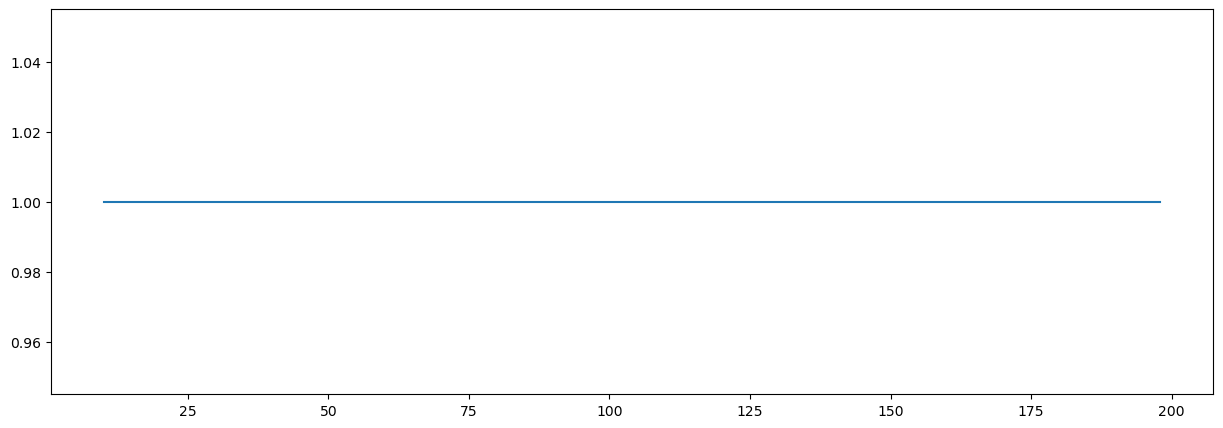

In [89]:
scores=[]
for i in range(10,200,2):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))


plt.figure(figsize=(15, 5))
plt.plot(range(10, 200, 2), scores)

                  
    

In [90]:
#using the DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=10,splitter='best')

In [92]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [96]:
pred=model.predict(X_test)

In [94]:
model.score(X_train,y_train)

1.0

In [95]:
model.score(X_test,y_test)

1.0

In [98]:
acc=accuracy_score(y_test,pred)
acc

1.0

In [100]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [102]:
cm=confusion_matrix(y_test,pred)
cm

array([[ 9,  0],
       [ 0, 10]], dtype=int64)

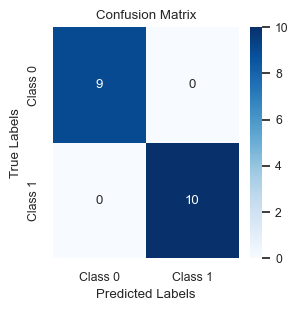

In [104]:
# Define class labels
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [109]:
#model dump
import joblib

In [110]:
joblib.dump(model, 'parkinson-model.pkl')

['parkinson-model.pkl']